In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.constants import Boltzmann

In [5]:
#Define Drift and Diffusion
def double_well_potential(x,noise):
    drift = (-2*x**3 + 12*x**2 -18*x + 3) 
    difussion = 0.2
    return drift + difussion*noise

#Define gaussian noise

def gaussian_noise(mean, std, samples):
    return np.random.normal(mean,std, samples)

def investment(x,noise):
    drift = 0.0829*x 
    difussion = 0.4039*x
    return drift + difussion*noise


In [6]:
#initial values

x = 0.2  #INITIAL POSITION
h = 0.01  # time steps
N = 5000 # number of iterations
noise = gaussian_noise(0, 1, N) #Noise with vanishing mean
sets = 6 # Number of trayectories


def trayectories(pos_init, time_step, noise, iterations, sets):
    positions = [] #Create list with new positions
    time = []
    
    for j in range (0, sets,1):
        pos = pos_init
        np.random.shuffle(noise)   
        for i in range (0,iterations,1):
            update = double_well_potential(pos,noise[i])
            #update positions
            pos = pos + time_step*update
            positions.append(pos)
            time.append(time_step*i)
    
    return np.asarray(positions) , np.asarray(time)


double_well_trayectories, time = trayectories(x,h,noise,N,sets)

double_well_trayectories = double_well_trayectories.reshape(sets,N)
time = time.reshape(sets,N)
time.shape


(6, 5000)

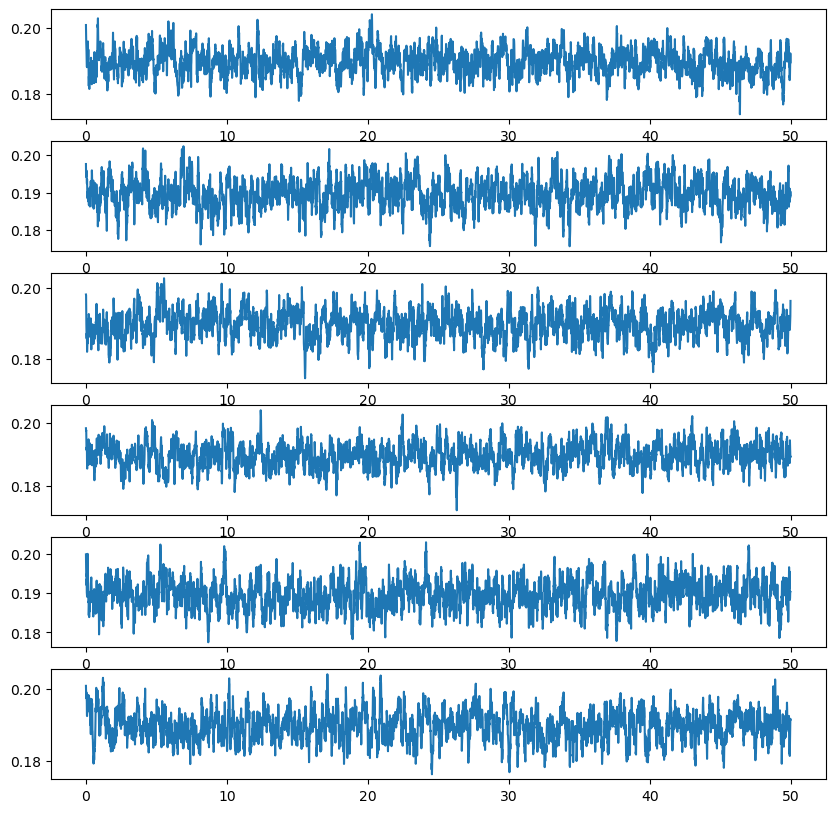

In [8]:
fig, axis = plt.subplots(nrows=sets, ncols=1, figsize = (10,10))
for i in range (0, len(double_well_trayectories)):
    axis[i].plot(time[i], double_well_trayectories[i])

(array([2.00804605e-01, 1.83019054e+00, 1.32014684e+01, 4.85717652e+01,
        9.06661476e+01, 8.31847418e+01, 3.88069242e+01, 9.09931723e+00,
        1.22203945e+00, 8.03218418e-02]),
 array([0.17297456, 0.17646053, 0.17994651, 0.18343249, 0.18691846,
        0.19040444, 0.19389041, 0.19737639, 0.20086237, 0.20434834,
        0.20783432]),
 <BarContainer object of 10 artists>)

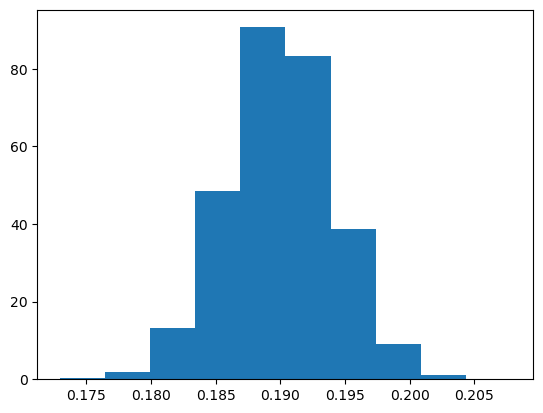

In [ ]:
plt.hist(double_well_trayectories[i], density=True)


/tmp/ipykernel_56148/3859952359.py:5: RuntimeWarning: invalid value encountered in log
  plt.plot(np.linspace(-1, 2, 1001),np.log(drift_derivate(np.linspace(-1,2, 1001))) )


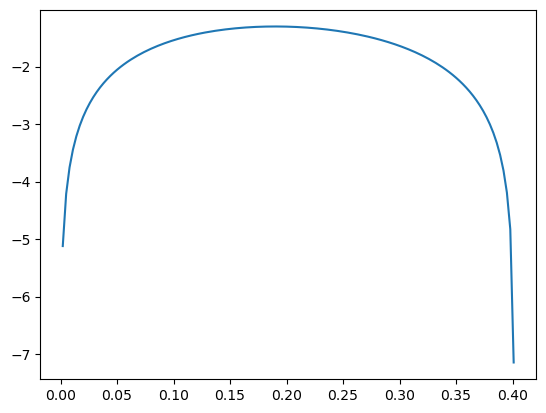

In [ ]:
def drift_derivate(x):
    return((-1/2)*x**4 + 4*x**3 -9*x**2 + 3*x ) 


plt.plot(np.linspace(-1, 2, 1001),np.log(drift_derivate(np.linspace(-1,2, 1001))) )